<a href="https://colab.research.google.com/github/mabhipsa12/Scorecard-Project/blob/main/scorecard_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

#📌 Step 1: Load and Explore the Datasets

Objective:\
1) Load the application_record.csv and credit_record.csv.\
2) Check basic details like shape, missing values, and data types.



app_df = pd.read_csv('/application_record.csv')
credit_df = pd.read_csv('/credit_record.csv')

In [3]:
import pandas as pd
import numpy as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# prompt: import application data as app_df and creditdata as credit_df

import pandas as pd
app_df = pd.read_csv('/application_record.csv')
credit_df = pd.read_csv('/credit_record.csv')


In [9]:
# Display first 5 rows of each dataset
print("\nApplication Data Sample:")
display(app_df.head())

print("\nCredit Data Sample:")
display(credit_df.head())


Application Data Sample:


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0



Credit Data Sample:


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [10]:
# Check column types
print("\nData Types in Application Data:")
print(app_df.dtypes)

print("\nData Types in Credit Data:")
print(credit_df.dtypes)


Data Types in Application Data:
ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

Data Types in Credit Data:
ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object


In [11]:
# prompt: find null values in columns

# Check for null values in each column of the application dataset
print("\nNull Values in Application Data:")
print(app_df.isnull().sum())

# Check for null values in each column of the credit dataset
print("\nNull Values in Credit Data:")
print(credit_df.isnull().sum())



Null Values in Application Data:
ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

Null Values in Credit Data:
ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


🔹 Findings from Data Exploration

*   The OCCUPATION_TYPE column has 134,203 missing values (a significant amount).
*   Other columns have no missing values, which is good.



In [15]:
# prompt: find the fill rate for both the dataset app_df and credit_df

# Calculate the fill rate for each dataset
def calculate_fill_rate(df):
  return (df.notnull().sum() / len(df)) * 100


print("Fill Rate for Application Data:")
print(calculate_fill_rate(app_df))
print("\nFill Rate for Credit Data:")
print(calculate_fill_rate(credit_df))


Fill Rate for Application Data:
ID                     100.000000
CODE_GENDER            100.000000
FLAG_OWN_CAR           100.000000
FLAG_OWN_REALTY        100.000000
CNT_CHILDREN           100.000000
AMT_INCOME_TOTAL       100.000000
NAME_INCOME_TYPE       100.000000
NAME_EDUCATION_TYPE    100.000000
NAME_FAMILY_STATUS     100.000000
NAME_HOUSING_TYPE      100.000000
DAYS_BIRTH             100.000000
DAYS_EMPLOYED          100.000000
FLAG_MOBIL             100.000000
FLAG_WORK_PHONE        100.000000
FLAG_PHONE             100.000000
FLAG_EMAIL             100.000000
OCCUPATION_TYPE         69.398961
CNT_FAM_MEMBERS        100.000000
dtype: float64

Fill Rate for Credit Data:
ID                100.0
MONTHS_BALANCE    100.0
STATUS            100.0
dtype: float64


#📌 Step 2: Data Cleaning

OBJECTIVE:

1.Handle missing values\
2.Convert data types if needed\
3.Remove duplicates

In [16]:
#Filling missing values of OCCUPATION_TYPE
mode_value = app_df['OCCUPATION_TYPE'].mode()[0]
app_df['OCCUPATION_TYPE'].fillna(mode_value, inplace=True)

<ipython-input-16-bbc09de54286>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_df['OCCUPATION_TYPE'].fillna(mode_value, inplace=True)


In [17]:
# Convert CNT_FAM_MEMBERS to integer
app_df['CNT_FAM_MEMBERS'] = app_df['CNT_FAM_MEMBERS'].astype(int)

#📌 Step 3: Define Target Variables

In [18]:
# prompt: merge both datasets app_df and credit_df

import pandas as pd
# Merge the two datasets based on the ID column
merged_df = pd.merge(app_df, credit_df, on='ID', how='inner')

# Display the first few rows of the merged dataset
print("\nMerged Data Sample:")
display(merged_df.head())



Merged Data Sample:


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2,-4,C


In [19]:
#Defining the target variable
#The target variable is whether a customer has 90+ Days Past Due (DPD), which indicates a bad credit risk.
merged_df['Bad_Credit'] = merged_df['STATUS'].apply(lambda x: 1 if x in ['3', '4', '5'] else 0)


In [ ]:
 #Aggregation at the Customer Level
 bad_credit_status = credit_df.groupby('ID')['Bad_Credit'].max().reset_index()


In [ ]:
#Merge with Application Data
df = app_df.merge(credit_df, on='ID', how='left')

In [ ]:
df.loc[df['ID'].isin(bad_credit_status['ID']), 'Bad_Credit'] = bad_credit_status['Bad_Credit']

Bad_Credit
0.0    45535
1.0      242
Name: count, dtype: int64


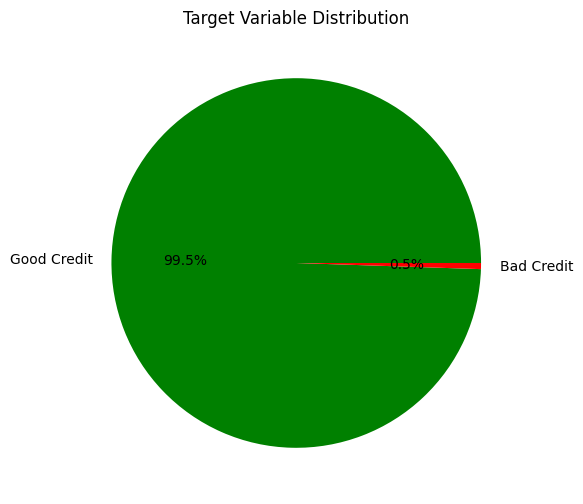

In [ ]:
# Checking Class Distribution
print(df['Bad_Credit'].value_counts())

df['Bad_Credit'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['green', 'red'],
    labels=['Good Credit', 'Bad Credit'],
    figsize=(6, 6)
)
plt.title("Target Variable Distribution")
plt.ylabel("")  # Hide y-axis label
plt.show()




**#Findings :**\
1.Since bad credit cases make up only 0.1% of the dataset, this indicates a severe class imbalance problem.\
2.If left unaddressed, machine learning models will likely favor the majority class (good credit) and fail to accurately predict bad credit cases.\
3.Hence we can handle this class imbalance further.

#📌 Step 4: Feature Engineering





In [ ]:
# Convert DAYS_BIRTH to Age in Years
df['AGE_YEARS'] = (-df['DAYS_BIRTH']) // 365

In [ ]:
#EMPLOYMENT_YEARS
df['EMPLOYMENT_YEARS'] = df['DAYS_EMPLOYED'].apply(lambda x: -x // 365 if x != 365243 else np.nan)


In [ ]:
#YEARS_BEFORE_EMPLOYMENT(The difference between Age and Employment Duration)
df['YEARS_BEFORE_EMPLOYMENT'] = df['AGE_YEARS'] - df['EMPLOYMENT_YEARS']


In [ ]:
#EMPLOYMENT_STATUS
df['EMPLOYMENT_STATUS'] = df['DAYS_EMPLOYED'].apply(lambda x:
    'Unemployed' if x == 365243 else
    'Short-term' if x > -365*2 else
    'Mid-term' if x > -365*5 else
    'Long-term'
)


In [ ]:
 # Employment stability ratio
df['EMPLOYMENT_STABILITY'] = df['EMPLOYMENT_YEARS'] / df['AGE_YEARS']

In [ ]:
#INCOME PER CHILD
df['INCOME_PER_CHILD'] = df['AMT_INCOME_TOTAL'] / (df['CNT_CHILDREN'] + 1)
#Note:  Why +1? To avoid division by zero when there are no children.

In [ ]:
#INCOME PER FAMILY MEMBER
df['INCOME_PER_FAMILY_MEMBER'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
#This shows how much income is available per household member.

In [ ]:
#INCOME TO AGE RATIO
df['INCOME_TO_AGE_RATIO'] = df['AMT_INCOME_TOTAL'] / df['AGE_YEARS']
#Higher values indicate higher earnings relative to the applicant's age.

In [ ]:
 #INCOME TO EMPLOYMENT RATIO
 df['INCOME_TO_EMPLOYMENT_RATIO'] = df['AMT_INCOME_TOTAL'] / (df['EMPLOYMENT_YEARS'] + 1)

In [ ]:
#INCOME_PER_YEAR
df['INCOME_PER_YEAR'] = df['AMT_INCOME_TOTAL'] / (df['AGE_YEARS'] )

In [ ]:
#HOUSE_OWNERSHIP_IMPACT
df['HOUSE_OWNERSHIP_IMPACT'] = df['AMT_INCOME_TOTAL'] * df['FLAG_OWN_REALTY'].apply(lambda x: 1 if x == 'Y' else 0)

In [ ]:
#CAR_OWNERSHIP_IMPACT
df['CAR_OWNERSHIP_IMPACT'] = df['AMT_INCOME_TOTAL'] * df['FLAG_OWN_CAR'].apply(lambda x: 1 if x == 'Y' else 0)

In [ ]:
#EMPLOYMENT_GAP_RATIO
df['EMPLOYMENT_GAP_RATIO'] = df['YEARS_BEFORE_EMPLOYMENT'] / df['AGE_YEARS']
#Proportion of life spent unemployed

In [ ]:
#EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO
df['EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO'] = df['YEARS_BEFORE_EMPLOYMENT'] / (df['EMPLOYMENT_YEARS']+1)
#Years before employment compared to total work years

In [ ]:
#LONG_TERM_EMPLOYMENT
df['LONG_TERM_EMPLOYMENT'] = df['EMPLOYMENT_YEARS'].apply(lambda x: 1 if x >= 10 else 0)
#Indicator for long-term employment

In [ ]:
#UNEMPLOYMENT_INDICATOR
df['UNEMPLOYMENT_INDICATOR'] = df['EMPLOYMENT_YEARS'].apply(lambda x: 1 if x == 365243 else 0)
#Indicator for unemployment


In [ ]:
#EMPLOYMENT_INCOME_RATIO
df['EMPLOYMENT_INCOME_RATIO'] = df['AMT_INCOME_TOTAL'] / (df['EMPLOYMENT_YEARS'] + 1)

In [ ]:
df['FREQUENT_JOB_CHANGER'] = (df['EMPLOYMENT_GAP_RATIO'] > 0.5).astype(int)

In [ ]:
df['EMPLOYMENT_SECURE_SCORE'] = df['LONG_TERM_EMPLOYMENT'] * 100

In [ ]:
df['UNEMPLOYMENT_HISTORY'] = df['UNEMPLOYMENT_INDICATOR'] * df['EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO']

In [ ]:
df['EMPLOYMENT_TENURE_RATIO'] = df['EMPLOYMENT_YEARS'] / (df['EMPLOYMENT_YEARS'] + df['EMPLOYMENT_GAP_RATIO'] + 1)

In [ ]:
df['ANNUAL_EXPENSES_ESTIMATE'] = df['AMT_INCOME_TOTAL'] * 0.6

In [ ]:
df['SAVINGS_ESTIMATE'] = df['AMT_INCOME_TOTAL'] - df['ANNUAL_EXPENSES_ESTIMATE']

In [ ]:
df['EXPENSE_RATIO'] = df['ANNUAL_EXPENSES_ESTIMATE'] / df['AMT_INCOME_TOTAL']

In [ ]:
df['WEALTH_INDEX'] = df['SAVINGS_ESTIMATE'] / df['AMT_INCOME_TOTAL']

In [ ]:
df['DISPOSABLE_INCOME_RATIO'] = df['SAVINGS_ESTIMATE'] / df['AMT_INCOME_TOTAL']

In [ ]:
df['INCOME_PER_WORKING_YEAR'] = df['AMT_INCOME_TOTAL'] / (df['EMPLOYMENT_YEARS']+1)

In [ ]:
df['INCOME_STABILITY_SCORE'] = (df['AMT_INCOME_TOTAL']> 300000).astype(int)

In [ ]:
df['RENT_OR_OWN_INDICATOR'] = (df['NAME_HOUSING_TYPE'] == 'Rented apartment').astype(int)

In [ ]:
df['MULTIPLE_PROPERTY_OWNER'] = ((df['FLAG_OWN_REALTY'] == 'Y') & (df['FLAG_OWN_CAR'] == 'Y')).astype(int)

In [ ]:
df['CAR_LUXURY_SCORE'] = ((df['FLAG_OWN_CAR'] == 'Y') & (df['AMT_INCOME_TOTAL'] > 500000)).astype(int)

In [ ]:
    #  Credit Activity Features
    df['TOTAL_MONTHS'] = df.groupby('ID')['MONTHS_BALANCE'].transform('count')
    df['MONTHS_SINCE_FIRST'] = df.groupby('ID')['MONTHS_BALANCE'].transform('min').abs()
    df['MONTHS_SINCE_LAST'] = df.groupby('ID')['MONTHS_BALANCE'].transform('max').abs()

In [ ]:
# Repayment Behavior Features
df['TOTAL_ON_TIME_PAYMENTS'] = df.groupby('ID')['STATUS'].transform(lambda x: (x == '0').sum())
df['TOTAL_LATE_PAYMENTS'] = df.groupby('ID')['STATUS'].transform(lambda x: (x.isin(['1', '2', '3', '4', '5'])).sum())
df['TOTAL_MISSED_PAYMENTS'] = df.groupby('ID')['STATUS'].transform(lambda x: (x == 'X').sum())
df['TOTAL_CLOSED_CREDITS'] = df.groupby('ID')['STATUS'].transform(lambda x: (x == 'C').sum())

In [ ]:
# Credit Health Ratios
df['LATE_PAYMENT_RATIO'] = df['TOTAL_LATE_PAYMENTS'] / df['TOTAL_MONTHS']
df['ON_TIME_PAYMENT_RATIO'] = df['TOTAL_ON_TIME_PAYMENTS'] / df['TOTAL_MONTHS']
df['MISSED_PAYMENT_RATIO'] = df['TOTAL_MISSED_PAYMENTS'] / df['TOTAL_MONTHS']
df['CREDIT_CLOSURE_RATIO'] = df['TOTAL_CLOSED_CREDITS'] / df['TOTAL_MONTHS']

In [ ]:
df.columns.tolist()

['ID',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'MONTHS_BALANCE',
 'STATUS',
 'Bad_Credit',
 'AGE_YEARS',
 'EMPLOYMENT_YEARS',
 'YEARS_BEFORE_EMPLOYMENT',
 'EMPLOYMENT_STATUS',
 'EMPLOYMENT_STABILITY',
 'INCOME_PER_CHILD',
 'INCOME_PER_FAMILY_MEMBER',
 'INCOME_TO_AGE_RATIO',
 'INCOME_TO_EMPLOYMENT_RATIO',
 'INCOME_PER_YEAR',
 'HOUSE_OWNERSHIP_IMPACT',
 'CAR_OWNERSHIP_IMPACT',
 'EMPLOYMENT_GAP_RATIO',
 'EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO',
 'LONG_TERM_EMPLOYMENT',
 'UNEMPLOYMENT_INDICATOR',
 'EMPLOYMENT_INCOME_RATIO',
 'FREQUENT_JOB_CHANGER',
 'EMPLOYMENT_SECURE_SCORE',
 'UNEMPLOYMENT_HISTORY',
 'EMPLOYMENT_TENURE_RATIO',
 'ANNUAL_EXPENSES_ESTIMATE',
 'SAVINGS_ESTIMATE',
 'EXPENSE_RATIO',
 'WEALTH_INDEX',
 'DISPO

#📌 Step 5: BINNING

In [ ]:
!pip install optbinning

In [ ]:
import pandas as pd
from optbinning import OptimalBinning

# Define the target variable
target = df["Bad_Credit"]

# Categorized variables based on their types
continuous_vars = [
    'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AGE_YEARS', 'EMPLOYMENT_YEARS',
    'YEARS_BEFORE_EMPLOYMENT', 'EMPLOYMENT_STABILITY', 'INCOME_PER_CHILD',
    'INCOME_PER_FAMILY_MEMBER', 'INCOME_TO_AGE_RATIO', 'INCOME_TO_EMPLOYMENT_RATIO',
    'INCOME_PER_YEAR', 'HOUSE_OWNERSHIP_IMPACT', 'CAR_OWNERSHIP_IMPACT', 'EMPLOYMENT_GAP_RATIO',
    'EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO', 'EMPLOYMENT_SECURE_SCORE', 'EMPLOYMENT_TENURE_RATIO',
    'ANNUAL_EXPENSES_ESTIMATE', 'SAVINGS_ESTIMATE', 'EXPENSE_RATIO', 'WEALTH_INDEX',
    'DISPOSABLE_INCOME_RATIO',
    'INCOME_PER_WORKING_YEAR', 'INCOME_STABILITY_SCORE',
    'CAR_LUXURY_SCORE', 'TOTAL_MONTHS', 'MONTHS_SINCE_FIRST', 'MONTHS_SINCE_LAST',
    'TOTAL_ON_TIME_PAYMENTS', 'TOTAL_LATE_PAYMENTS', 'TOTAL_MISSED_PAYMENTS',
    'TOTAL_CLOSED_CREDITS', 'LATE_PAYMENT_RATIO', 'ON_TIME_PAYMENT_RATIO', 'MISSED_PAYMENT_RATIO',
    'CREDIT_CLOSURE_RATIO'
]


discrete_vars = [
    'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
    'FLAG_EMAIL', 'UNEMPLOYMENT_INDICATOR', 'FREQUENT_JOB_CHANGER', 'UNEMPLOYMENT_HISTORY',
    'MULTIPLE_PROPERTY_OWNER', 'RENT_OR_OWN_INDICATOR', 'TOTAL_CLOSED_CREDITS'
]

categorical_vars = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
    'EMPLOYMENT_STATUS'
]

# Dictionary to store binning models
binning_models = {}

# Function to apply optimal binning
def apply_binning(var, var_type):
    print(f"\nBinning for {var}...")

    # Initialize binning model
    optb = OptimalBinning(name=var, dtype=var_type, solver="cp")  # 'cp' is a good general solver
    optb.fit(df[var], target)  # Fit the binning model

    # Print binning table
    print(optb.binning_table.build())

    # Store the binning model
    binning_models[var] = optb

# Apply binning to continuous and discrete variables
for var in continuous_vars:
    apply_binning(var, "numerical")

for var in discrete_vars:
    apply_binning(var, "numerical")  # Discrete variables are treated as numerical in optbinning

for var in categorical_vars:
    apply_binning(var, "categorical")

# Transform dataset by applying the binning rules
df_binned = df.copy()
for var, model in binning_models.items():
    df_binned[var + "_binned"] = model.transform(df[var])

# Save the binned dataset
df_binned.to_csv("binned_dataset.csv", index=False)

print("\n✅ Binning Completed. Transformed dataset saved as 'binned_dataset.csv'.")


Binning for AMT_INCOME_TOTAL...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for DAYS_BIRTH...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.9614

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    38808   0.032893      38624      184    0.004741   
1           Special        0   0.000000          0        0    0.000000   
2           Missing  1141007   0.967107       6911  1134096    0.993943   
Totals               1179815   1.000000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.561965  7.261098  0.293254  
1            0.0  0.000000  0.000000  
2      -1.885205  1.598775  0.174681  
Totals            8.859873  0.467934  

Binning for YEARS_BEFORE_EMPLOYMENT...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    38808   0.032893      38624      184    0.004741   
1           Special        0   0.000000          0        0    0.000000   
2           Missing  1141007   0.967107       6911  1134096    0.993943   
Totals               1179815   1.000000      45535  1134280    0.961405   

             

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for INCOME_PER_FAMILY_MEMBER...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

            

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    38808   0.032893      38624      184    0.004741   
1           Special        0   0.000000          0        0    0.000000   
2           Missing  1141007   0.967107       6911  1134096    0.993943   
Totals               1179815   1.000000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.561965  7.261098  0.293254  
1            0.0  0.000000  0.000000  
2      -1.885205  1.598775  0.174681  
Totals            8.859873  0.467934  

Binning for INCOME_PER_YEAR...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE     

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for EMPLOYMENT_GAP_RATIO...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    38808   0.032893      38624      184    0.004741   
1           Special        0   0.000000          0        0    0.000000   
2           Missing  1141007   0.967107       6911  1134096    0.993943   
Totals               1179815   1.000000      45535  1134280    0.961405   

             WoE

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    38808   0.032893      38624      184    0.004741   
1           Special        0   0.000000          0        0    0.000000   
2           Missing  1141007   0.967107       6911  1134096    0.993943   
Totals               1179815   1.000000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.561965  7.261098  0.293254  
1            0.0  0.000000  0.000000  
2      -1.885205  1.598775  0.174681  
Totals            8.859873  0.467934  

Binning for EMPLOYMENT_SECURE_SCORE...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for SAVINGS_ESTIMATE...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE    

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for WEALTH_INDEX...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for INCOME_PER_WORKING_YEAR...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    38808   0.032893      38624      184    0.004741   
1           Special        0   0.000000          0        0    0.000000   
2           Missing  1141007   0.967107       6911  1134096    0.993943   
Totals               1179815   1.000000      45535  1134280    0.961405   

             

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for CAR_LUXURY_SCORE...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE    

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for MONTHS_SINCE_FIRST...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE  

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for TOTAL_ON_TIME_PAYMENTS...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             W

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for TOTAL_MISSED_PAYMENTS...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             Wo

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for ON_TIME_PAYMENT_RATIO...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             Wo

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for CREDIT_CLOSURE_RATIO...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for FLAG_MOBIL...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for FLAG_PHONE...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for UNEMPLOYMENT_HISTORY...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    38808   0.032893      38624      184    0.004741   
1           Special        0   0.000000          0        0    0.000000   
2           Missing  1141007   0.967107       6911  1134096    0.993943   
Totals               1179815   1.000000      45535  1134280    0.961405   

             WoE

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for RENT_OR_OWN_INDICATOR...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             Wo

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

            Bin    Count  Count (%)  Non-event    Event  Event rate       WoE  \
0        [F, M]    45777     0.0388      45535      242    0.005286  8.452571   
1       Special        0     0.0000          0        0    0.000000       0.0   
2       Missing  1134038     0.9612          0  1134038    0.000000       0.0   
Totals           1179815     1.0000      45535  1134280    0.961405             

              IV        JS  
0       8.450768  0.345639  
1       0.000000  0.000000  
2       0.000000  0.000000  
Totals  8.450768  0.345639  

Binning for FLAG_OWN_CAR...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

            Bin    Count  Count (%)  Non-event    Event  Event rate       WoE  \
0        [N, Y]    45777     0.0388      45535      242    0.005286  8.452571   
1       Special        0     0.0000          0        0    0.000000       0.0   
2       Missing  1134038     0.9612          0  1134038    0.000000       0.0   
Totals           1179815     1.0000      45535  1134280    0.961405             

              IV        JS  
0       8.450768  0.345639  
1       0.000000  0.000000  
2       0.000000  0.000000  
Totals  8.450768  0.345639  

Binning for FLAG_OWN_REALTY...
            Bin    Count  Count (%)  Non-event    Event  Event rate       WoE  \
0        [N, Y]    45777     0.0388      45535      242    0.005286  8.452571   
1       Special        0     0.0000          0        0    0.000000       0.0   
2       Missing  1134038     0.9612          0  1134038    0.000000       0.0   
Totals           1179815     1.0000      45535  1134280    0.961405             

           

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                                                      Bin    Count  Count (%)  \
0       [Student, Working, Commercial associate, State...    45777     0.0388   
1                                                 Special        0     0.0000   
2                                                 Missing  1134038     0.9612   
Totals                                                     1179815     1.0000   

        Non-event    Event  Event rate       WoE        IV        JS  
0           45535      242    0.005286  8.452571  8.450768  0.345639  
1               0        0    0.000000       0.0  0.000000  0.000000  
2               0  1134038    0.000000       0.0  0.000000  0.000000  
Totals      45535  1134280    0.961405            8.450768  0.345639  

Binning for NAME_EDUCATION_TYPE...
                                                      Bin    Count  Count (%)  \
0       [Academic degree, Lower secondary, Incomplete ...    45777     0.0388   
1                                        

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                                                      Bin    Count  Count (%)  \
0       [Single / not married, Separated, Widow, Marri...    45777     0.0388   
1                                                 Special        0     0.0000   
2                                                 Missing  1134038     0.9612   
Totals                                                     1179815     1.0000   

        Non-event    Event  Event rate       WoE        IV        JS  
0           45535      242    0.005286  8.452571  8.450768  0.345639  
1               0        0    0.000000       0.0  0.000000  0.000000  
2               0  1134038    0.000000       0.0  0.000000  0.000000  
Totals      45535  1134280    0.961405            8.450768  0.345639  

Binning for NAME_HOUSING_TYPE...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                                                      Bin    Count  Count (%)  \
0       [Office apartment, Municipal apartment, House ...    45777     0.0388   
1                                                 Special        0     0.0000   
2                                                 Missing  1134038     0.9612   
Totals                                                     1179815     1.0000   

        Non-event    Event  Event rate       WoE        IV        JS  
0           45535      242    0.005286  8.452571  8.450768  0.345639  
1               0        0    0.000000       0.0  0.000000  0.000000  
2               0  1134038    0.000000       0.0  0.000000  0.000000  
Totals      45535  1134280    0.961405            8.450768  0.345639  

Binning for OCCUPATION_TYPE...
                                                      Bin    Count  Count (%)  \
0       [HR staff, Waiters/barmen staff, Accountants, ...    45777     0.0388   
1                                            

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                                                  Bin    Count  Count (%)  \
0       [Long-term, Mid-term, Short-term, Unemployed]    45777     0.0388   
1                                             Special        0     0.0000   
2                                             Missing  1134038     0.9612   
Totals                                                 1179815     1.0000   

        Non-event    Event  Event rate       WoE        IV        JS  
0           45535      242    0.005286  8.452571  8.450768  0.345639  
1               0        0    0.000000       0.0  0.000000  0.000000  
2               0  1134038    0.000000       0.0  0.000000  0.000000  
Totals      45535  1134280    0.961405            8.450768  0.345639  


/usr/local/lib/python3.11/dist-packages/optbinning/binning/transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)
/usr/local/lib/python3.11/dist-packages/optbinning/binning/transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)
/usr/local/lib/python3.11/dist-packages/optbinning/binning/transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)
/usr/local/lib/python3.11/dist-packages/optbinning/binning/transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)
/usr/local/lib/python3.11/dist-packages/optbinning/binning/transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)
/usr/local/lib/python3.11/dist-pack

In [ ]:
# List all columns that have the '_binned' suffix
binned_columns = [col for col in df_binned.columns if '_binned' in col]

# Print the binned columns
print(binned_columns)


**#📌 Step 6: CALCULATING WOE(Weight of Evidence)**

In [ ]:
import pandas as pd
import numpy as np

# Define the binned columns list (you provided this)
binned_columns = [
    'AMT_INCOME_TOTAL_binned', 'DAYS_BIRTH_binned', 'DAYS_EMPLOYED_binned', 'AGE_YEARS_binned',
    'EMPLOYMENT_YEARS_binned', 'YEARS_BEFORE_EMPLOYMENT_binned', 'EMPLOYMENT_STABILITY_binned',
    'INCOME_PER_CHILD_binned', 'INCOME_PER_FAMILY_MEMBER_binned', 'INCOME_TO_AGE_RATIO_binned',
    'INCOME_TO_EMPLOYMENT_RATIO_binned', 'INCOME_PER_YEAR_binned', 'HOUSE_OWNERSHIP_IMPACT_binned',
    'CAR_OWNERSHIP_IMPACT_binned', 'EMPLOYMENT_GAP_RATIO_binned', 'EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO_binned',
    'EMPLOYMENT_SECURE_SCORE_binned', 'EMPLOYMENT_TENURE_RATIO_binned', 'ANNUAL_EXPENSES_ESTIMATE_binned',
    'SAVINGS_ESTIMATE_binned', 'EXPENSE_RATIO_binned', 'WEALTH_INDEX_binned', 'DISPOSABLE_INCOME_RATIO _binned',
    'INCOME_PER_WORKING_YEAR  _binned', 'INCOME_STABILITY_SCORE_binned', 'CAR_LUXURY_SCORE_binned',
    'TOTAL_MONTHS_binned', 'MONTHS_SINCE_FIRST_binned', 'MONTHS_SINCE_LAST_binned',
    'TOTAL_ON_TIME_PAYMENTS_binned', 'TOTAL_LATE_PAYMENTS_binned', 'TOTAL_MISSED_PAYMENTS_binned',
    'TOTAL_CLOSED_CREDITS_binned', 'LATE_PAYMENT_RATIO_binned', 'ON_TIME_PAYMENT_RATIO_binned',
    'MISSED_PAYMENT_RATIO_binned', 'CREDIT_CLOSURE_RATIO_binned', 'CNT_CHILDREN_binned',
    'CNT_FAM_MEMBERS_binned', 'FLAG_MOBIL_binned', 'FLAG_WORK_PHONE_binned', 'FLAG_PHONE_binned',
    'FLAG_EMAIL_binned', 'UNEMPLOYMENT_INDICATOR_binned', 'FREQUENT_JOB_CHANGER_binned',
    'UNEMPLOYMENT_HISTORY_binned', 'MULTIPLE_PROPERTY_OWNER_binned', 'RENT_OR_OWN_INDICATOR_binned',
    'CODE_GENDER_binned', 'FLAG_OWN_CAR_binned', 'FLAG_OWN_REALTY_binned', 'NAME_INCOME_TYPE_binned',
    'NAME_EDUCATION_TYPE_binned', 'NAME_FAMILY_STATUS_binned', 'NAME_HOUSING_TYPE_binned', 'OCCUPATION_TYPE_binned',
    'EMPLOYMENT_STATUS_binned'
]

# Define the function to compute WOE for each binned column
def compute_woe(df, feature, target):
    # Group by the binned feature and calculate the counts of bad and good
    df_grouped = df.groupby(feature)[target].value_counts().unstack(fill_value=0)

    # Calculate the total number of good (Bad_Credit == 0) and bad (Bad_Credit == 1)
    total_good = df[target].value_counts().get(0, 0)
    total_bad = df[target].value_counts().get(1, 0)

    # Calculate the distribution of good and bad per bin
    df_grouped['Good_Distribution'] = df_grouped[0] / total_good
    df_grouped['Bad_Distribution'] = df_grouped[1] / total_bad

    # Calculate WOE
    df_grouped['WOE'] = np.log(df_grouped['Good_Distribution'] / df_grouped['Bad_Distribution'])

    return df_grouped[['WOE']]

# Apply WOE calculation for each binned column
woe_dict = {}
for column in binned_columns:
    woe_dict[column] = compute_woe(df_binned, column, 'Bad_Credit')

# Convert the dictionary to a single DataFrame with all WOE values
woe_df = pd.concat(woe_dict, axis=1)

# Display the WOE for the binned columns
print(woe_df)


In [ ]:
#Fill NaN WOE values with 0 (or any other value of your choice)
woe_df_filled = woe_df.fillna(0)
woe_df_filled

In [ ]:
# Summary statistics for the WOE values
print(woe_df_filled.describe())

# Visualize the WOE distribution for any column (e.g., AMT_INCOME_TOTAL_binned)
import matplotlib.pyplot as plt
woe_df_filled['AMT_INCOME_TOTAL_binned'].plot(kind='bar') # Changed woe_df_clean to woe_df_filled
plt.title("WOE Distribution for AMT_INCOME_TOTAL_binned")
plt.show()

# Task
want to create a scorecard out of it

Here is all the data you need:
"application_record.csv"
"credit_record.csv"

## Data loading

### Subtask:
Load the "application_record.csv" and "credit_record.csv" files into separate Pandas DataFrames.


**Reasoning**:
Load the two CSV files into pandas DataFrames.



In [ ]:
import pandas as pd

df_application = pd.read_csv('application_record.csv')
df_credit = pd.read_csv('credit_record.csv')

## Data exploration

### Subtask:
Explore the `df_application` and `df_credit` DataFrames to understand their structure and characteristics.


**Reasoning**:
Explore the structure and characteristics of the `df_application` and `df_credit` DataFrames, including shape, data types, missing values, descriptive statistics, and unique values for categorical features.



In [ ]:
# Examine the shape of both DataFrames
print("df_application shape:", df_application.shape)
print("df_credit shape:", df_credit.shape)

# Inspect the data types of the features
print("\ndf_application data types:\n", df_application.dtypes)
print("\ndf_credit data types:\n", df_credit.dtypes)

# Identify missing values
print("\ndf_application missing values:\n", df_application.isnull().sum())
print("\ndf_credit missing values:\n", df_credit.isnull().sum())

# Analyze the distribution of numerical features
print("\ndf_application numerical features descriptive statistics:\n",
      df_application.describe())
print("\ndf_credit numerical features descriptive statistics:\n",
      df_credit.describe())

# Explore the unique values of categorical features
for column in df_application.select_dtypes(include=['object']).columns:
    print(f"\nUnique values for {column} in df_application:")
    print(df_application[column].value_counts())

for column in df_credit.select_dtypes(include=['object']).columns:
    print(f"\nUnique values for {column} in df_credit:")
    print(df_credit[column].value_counts())

df_application shape: (438557, 18)
df_credit shape: (1048575, 3)

df_application data types:
 ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

df_credit data types:
 ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

df_application missing values:
 ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INC

**Reasoning**:
Analyze the relationship between numerical features in `df_application` and visualize the distributions of numerical features using histograms and box plots.



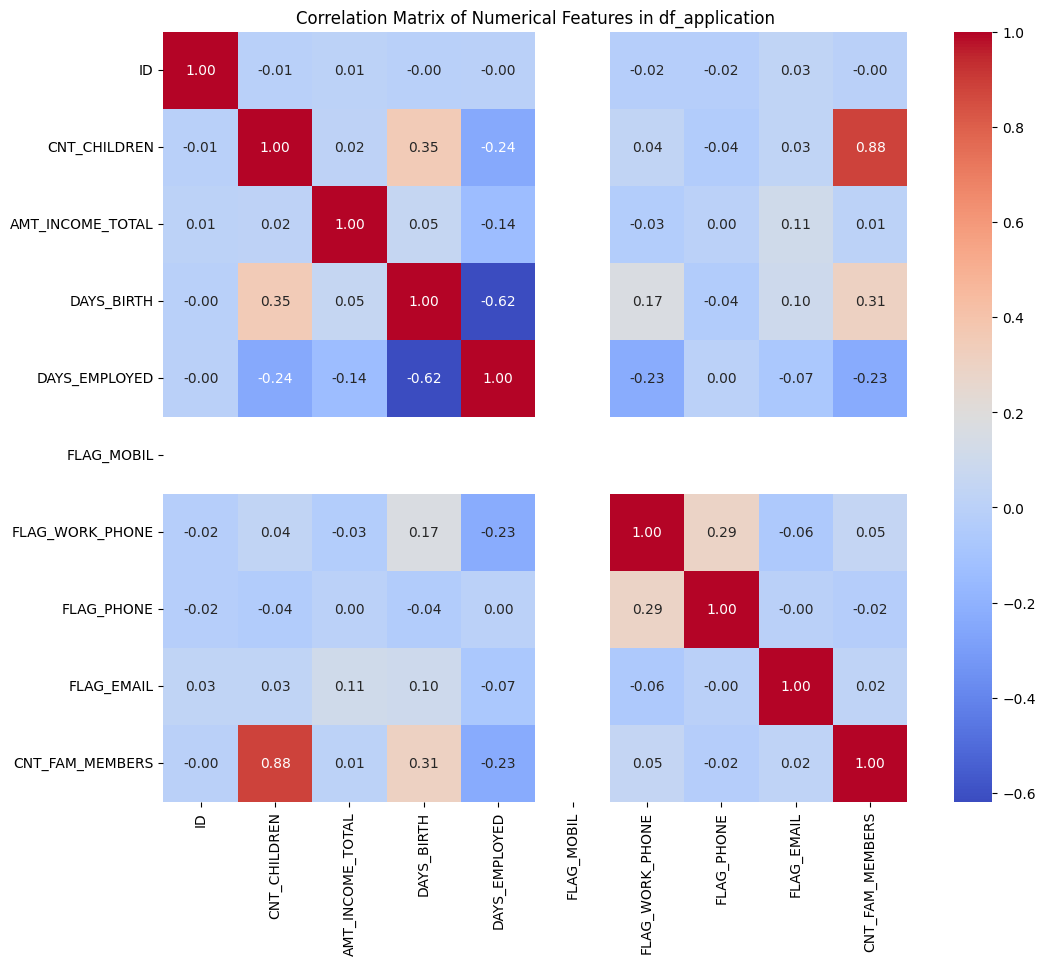

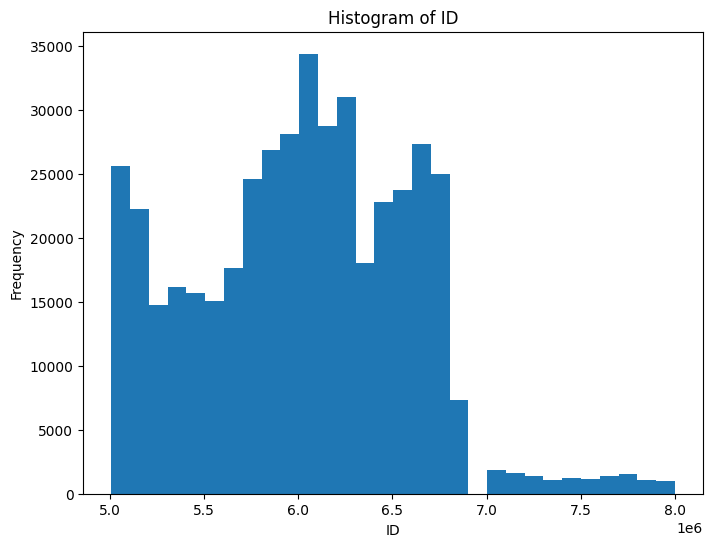

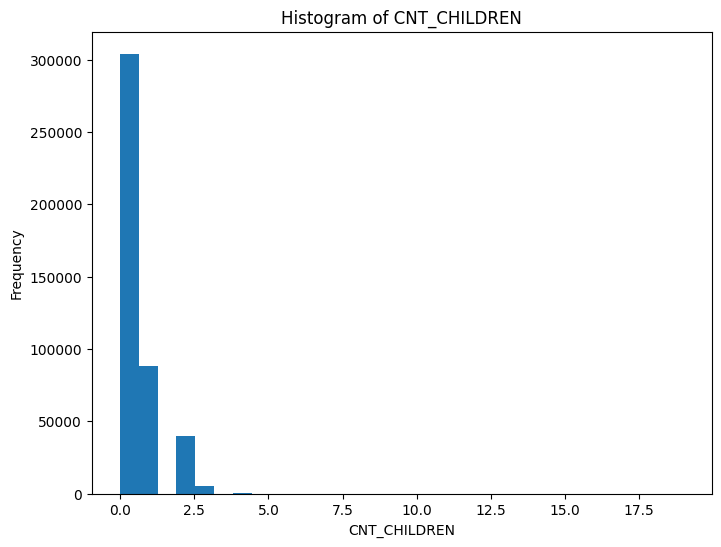

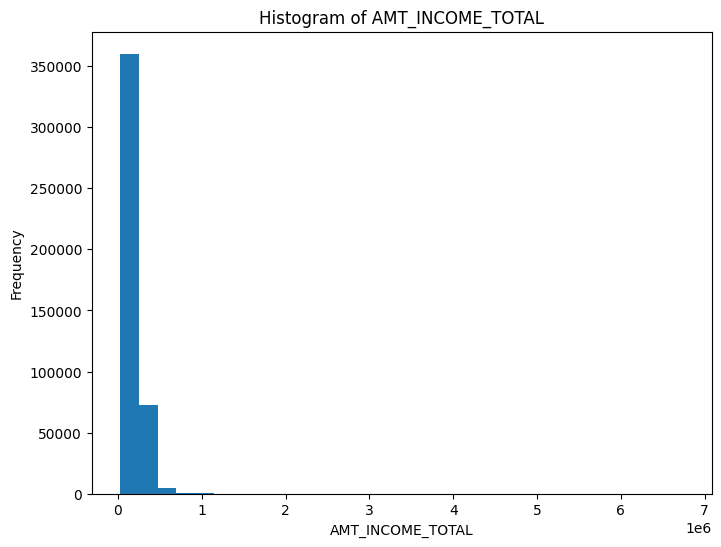

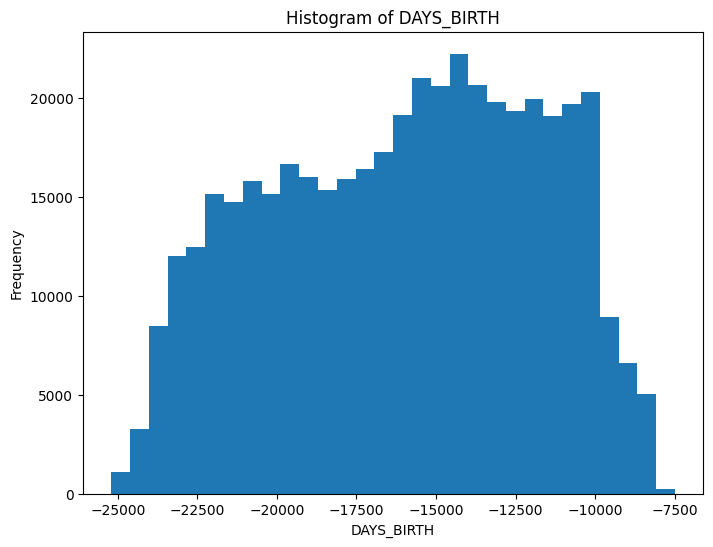

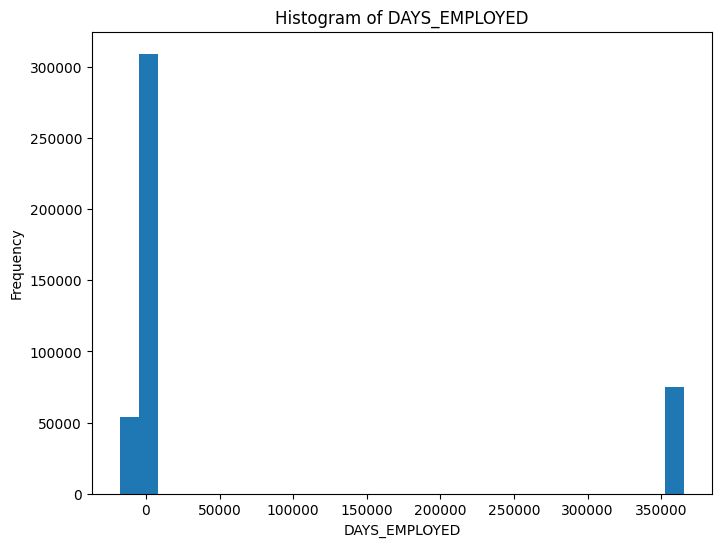

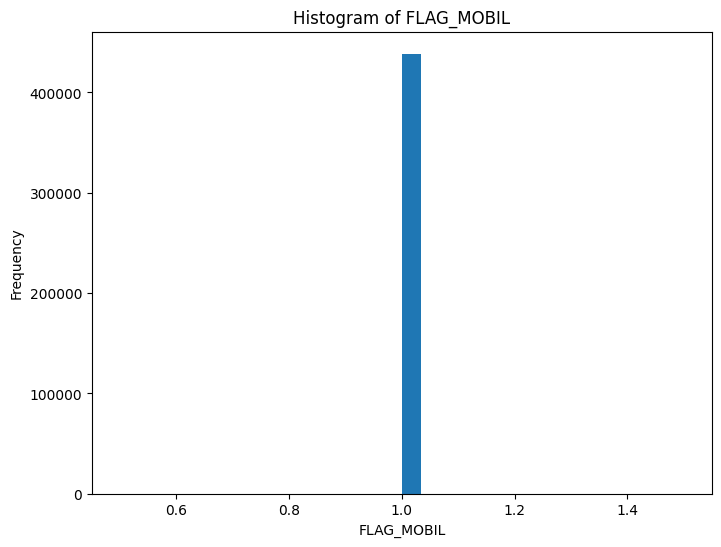

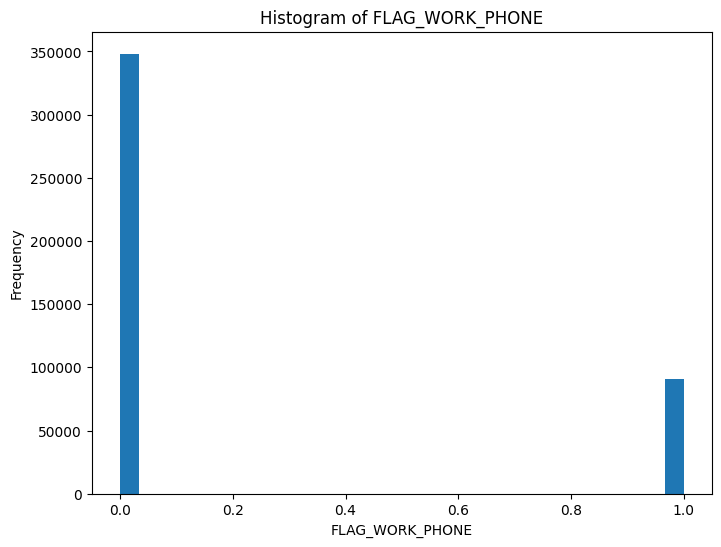

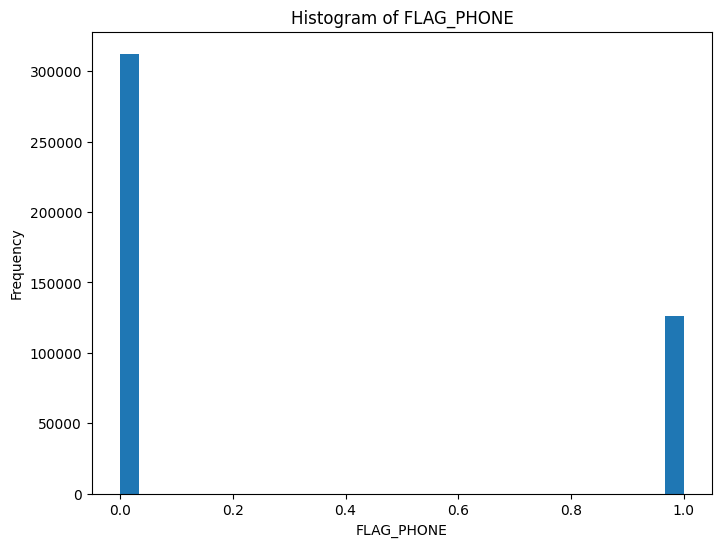

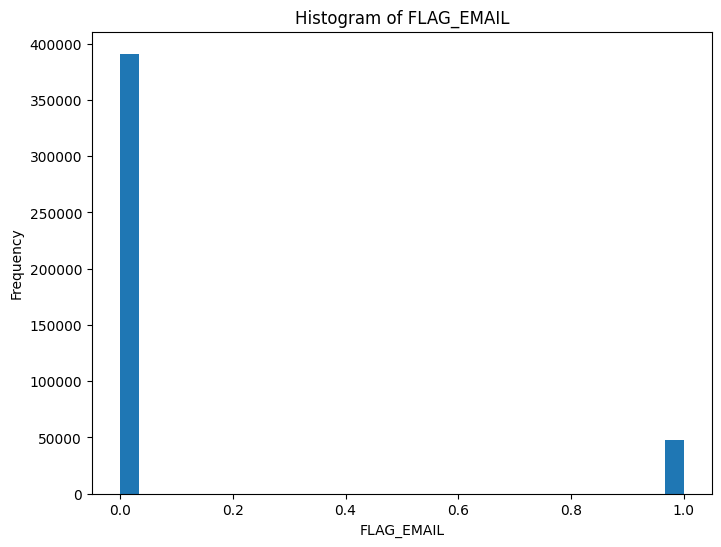

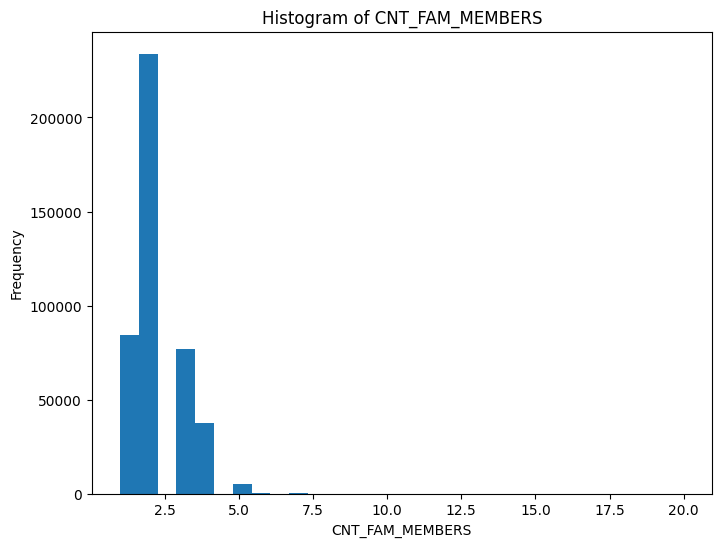

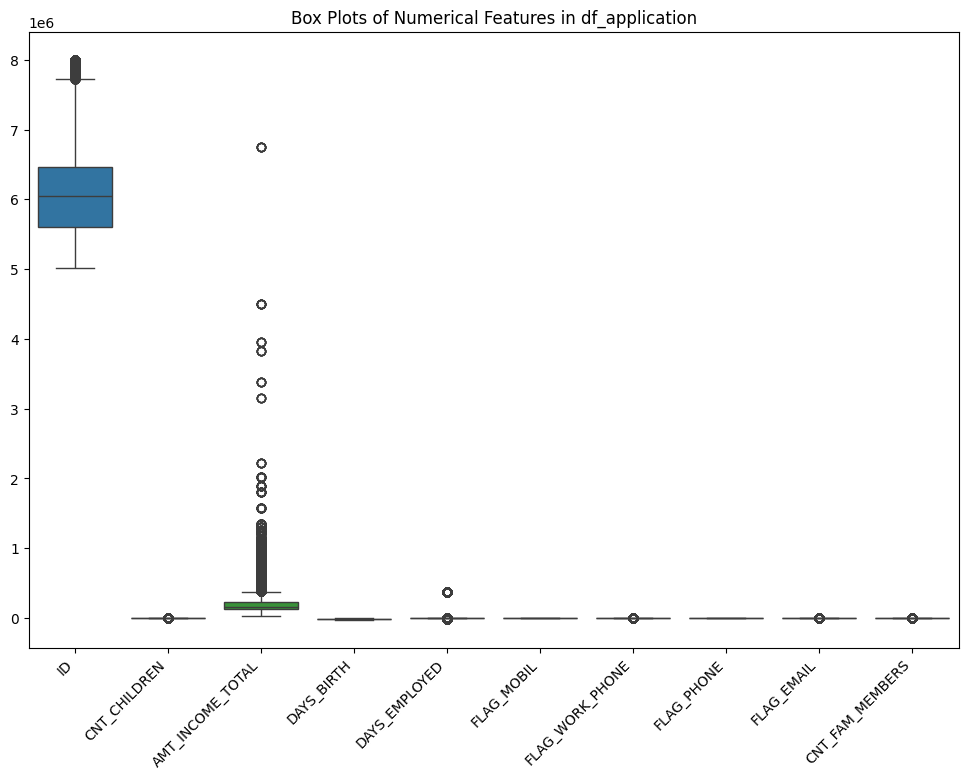

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for numerical features in df_application
numerical_features = df_application.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features in df_application')
plt.show()

# Visualize the distribution of numerical features using histograms
for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df_application[column].dropna(), bins=30)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

# Visualize the distribution of numerical features using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_features)
plt.title('Box Plots of Numerical Features in df_application')
plt.xticks(rotation=45, ha='right')
plt.show()

**Reasoning**:
Explore the unique values and their frequencies for categorical features in both DataFrames and visualize the distribution of categorical features using bar charts or count plots.




Unique values for CODE_GENDER in df_application:
CODE_GENDER
F    294440
M    144117
Name: count, dtype: int64


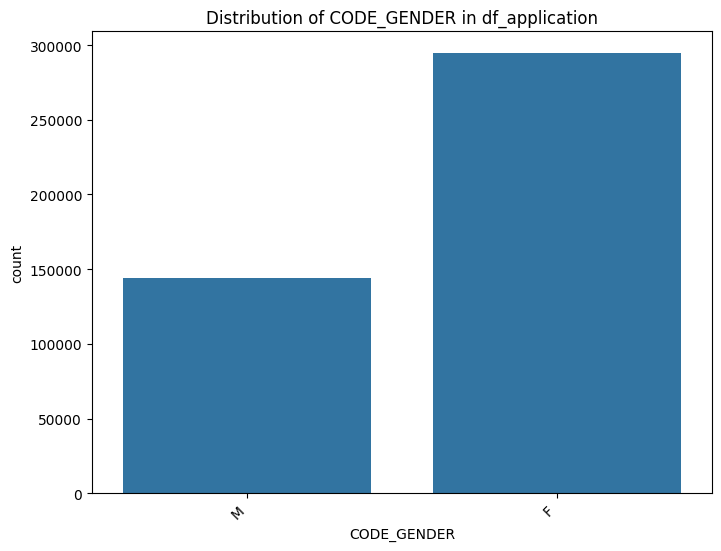


Unique values for FLAG_OWN_CAR in df_application:
FLAG_OWN_CAR
N    275459
Y    163098
Name: count, dtype: int64


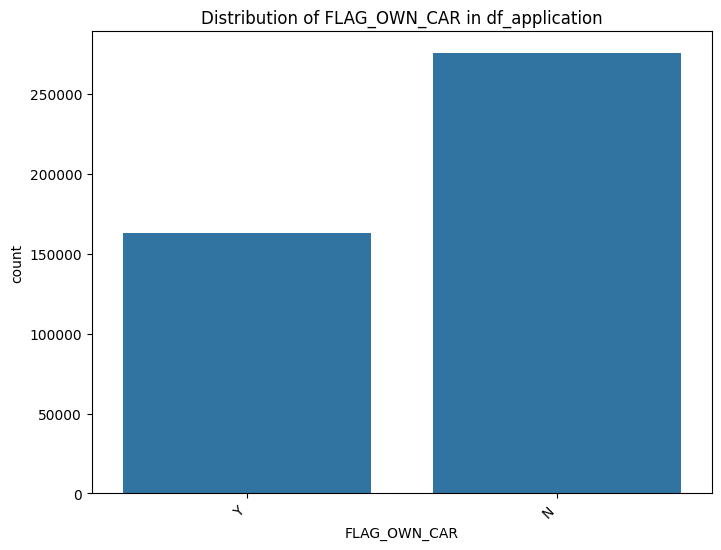


Unique values for FLAG_OWN_REALTY in df_application:
FLAG_OWN_REALTY
Y    304074
N    134483
Name: count, dtype: int64


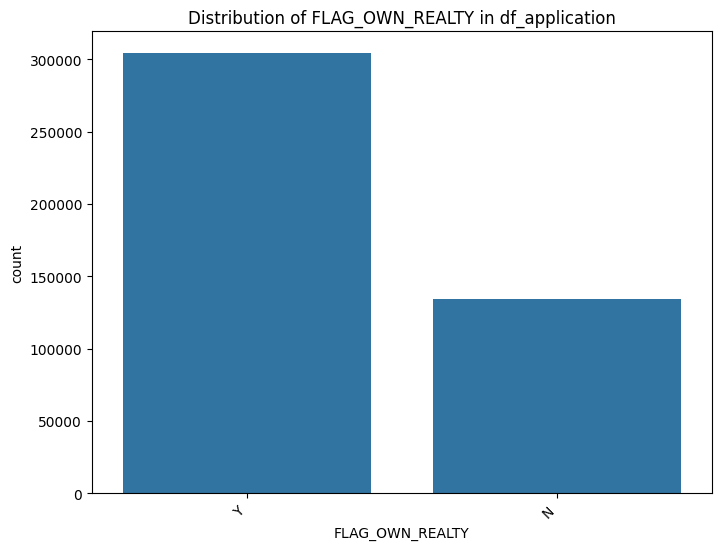


Unique values for NAME_INCOME_TYPE in df_application:
NAME_INCOME_TYPE
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: count, dtype: int64


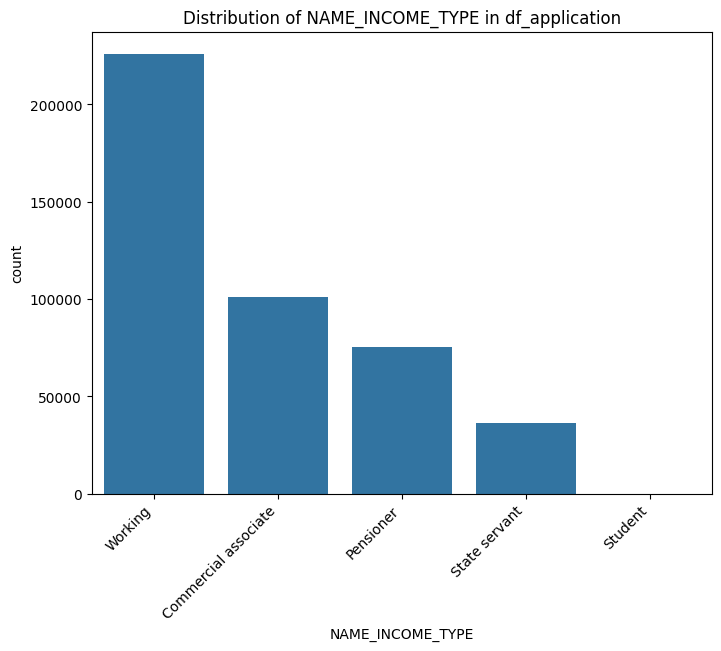


Unique values for NAME_EDUCATION_TYPE in df_application:
NAME_EDUCATION_TYPE
Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: count, dtype: int64


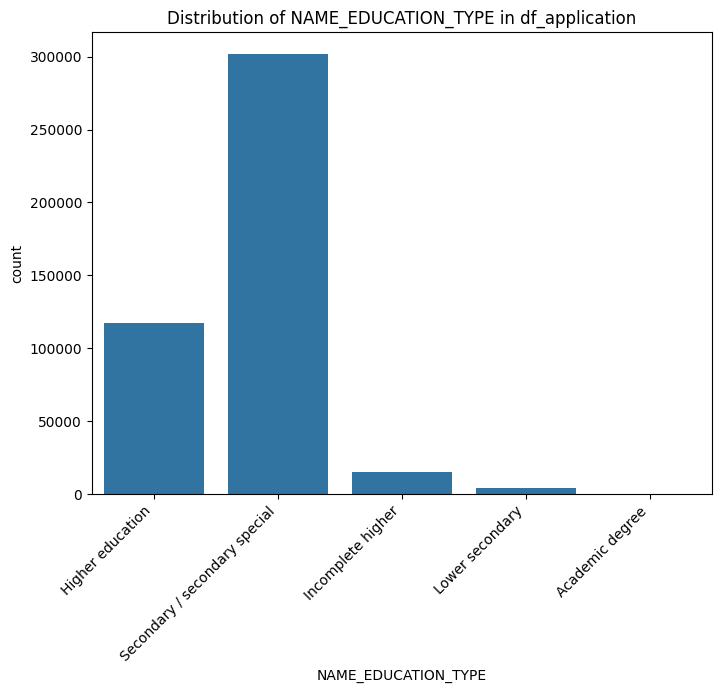


Unique values for NAME_FAMILY_STATUS in df_application:
NAME_FAMILY_STATUS
Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: count, dtype: int64


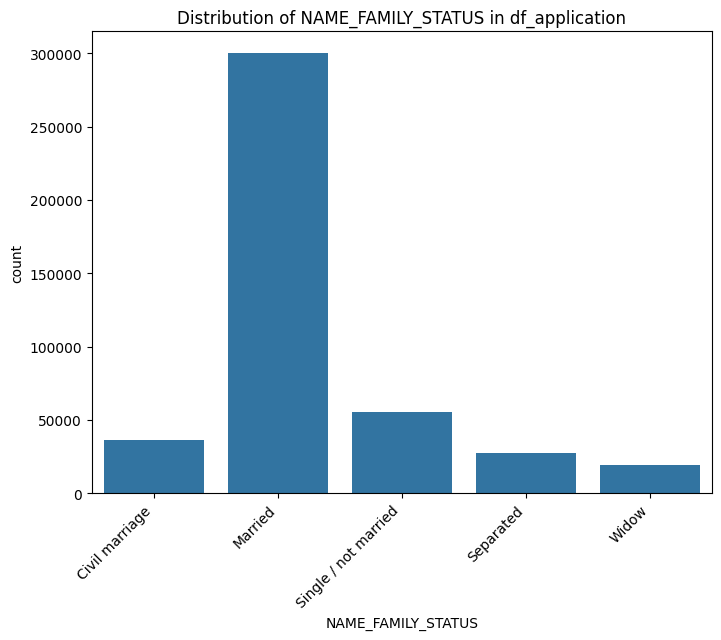


Unique values for NAME_HOUSING_TYPE in df_application:
NAME_HOUSING_TYPE
House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: count, dtype: int64


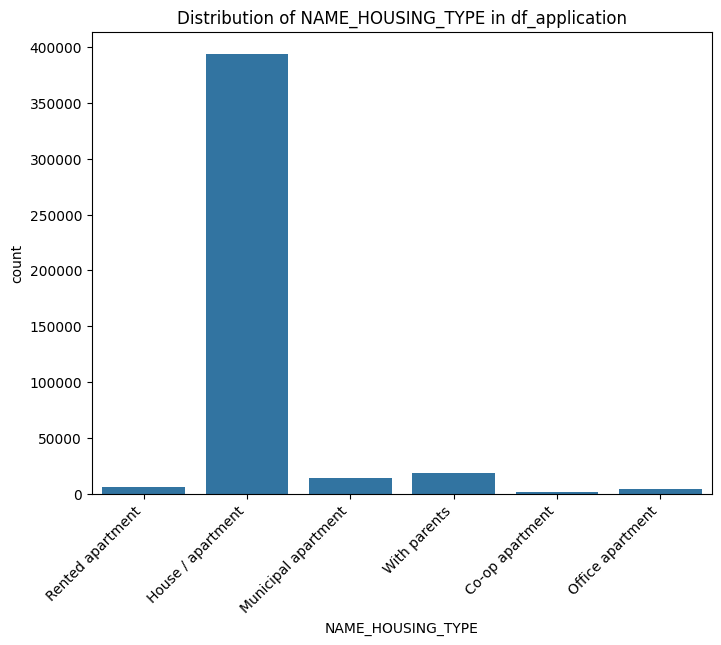


Unique values for OCCUPATION_TYPE in df_application:
OCCUPATION_TYPE
Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: count, dtype: int64


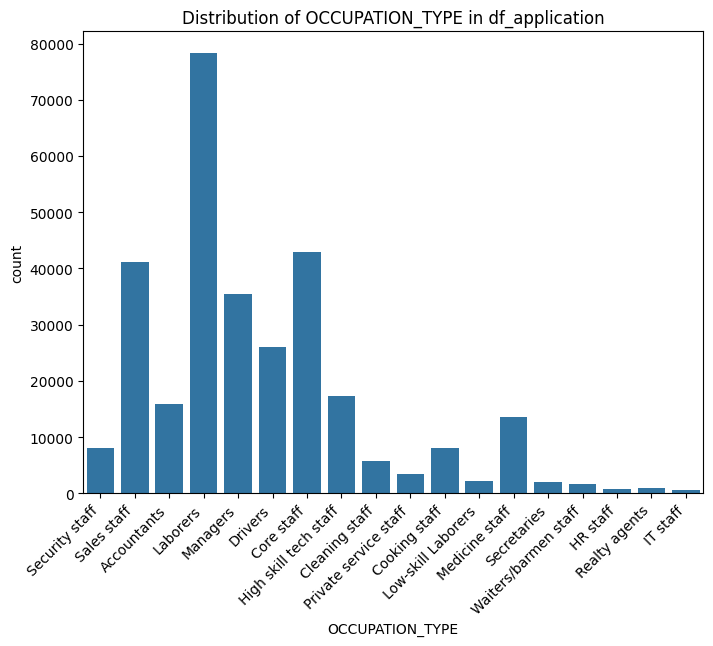


Unique values for STATUS in df_credit:
STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64


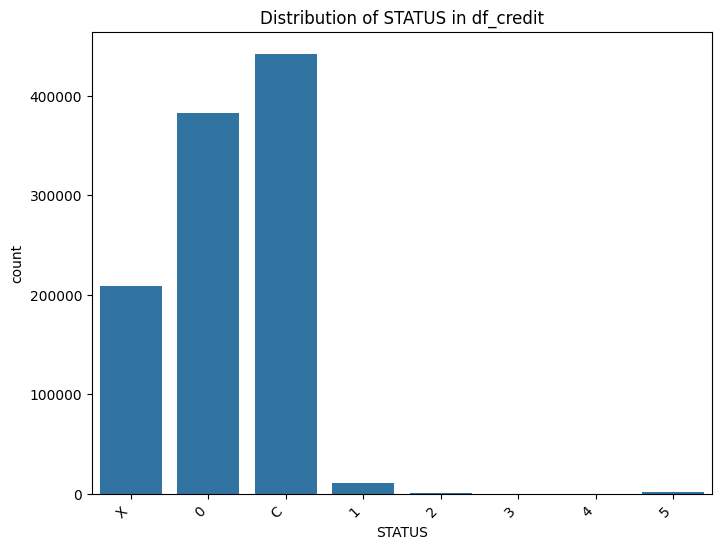

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the unique values of categorical features in df_application
categorical_features_application = df_application.select_dtypes(include=['object'])
for column in categorical_features_application.columns:
    print(f"\nUnique values for {column} in df_application:")
    print(df_application[column].value_counts())
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df_application)
    plt.title(f'Distribution of {column} in df_application')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Explore the unique values of categorical features in df_credit
categorical_features_credit = df_credit.select_dtypes(include=['object'])
for column in categorical_features_credit.columns:
    print(f"\nUnique values for {column} in df_credit:")
    print(df_credit[column].value_counts())
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df_credit)
    plt.title(f'Distribution of {column} in df_credit')
    plt.xticks(rotation=45, ha='right')
    plt.show()

**Reasoning**:
Investigate the correlations between numerical features and examine potential interactions between different features in `df_application`.



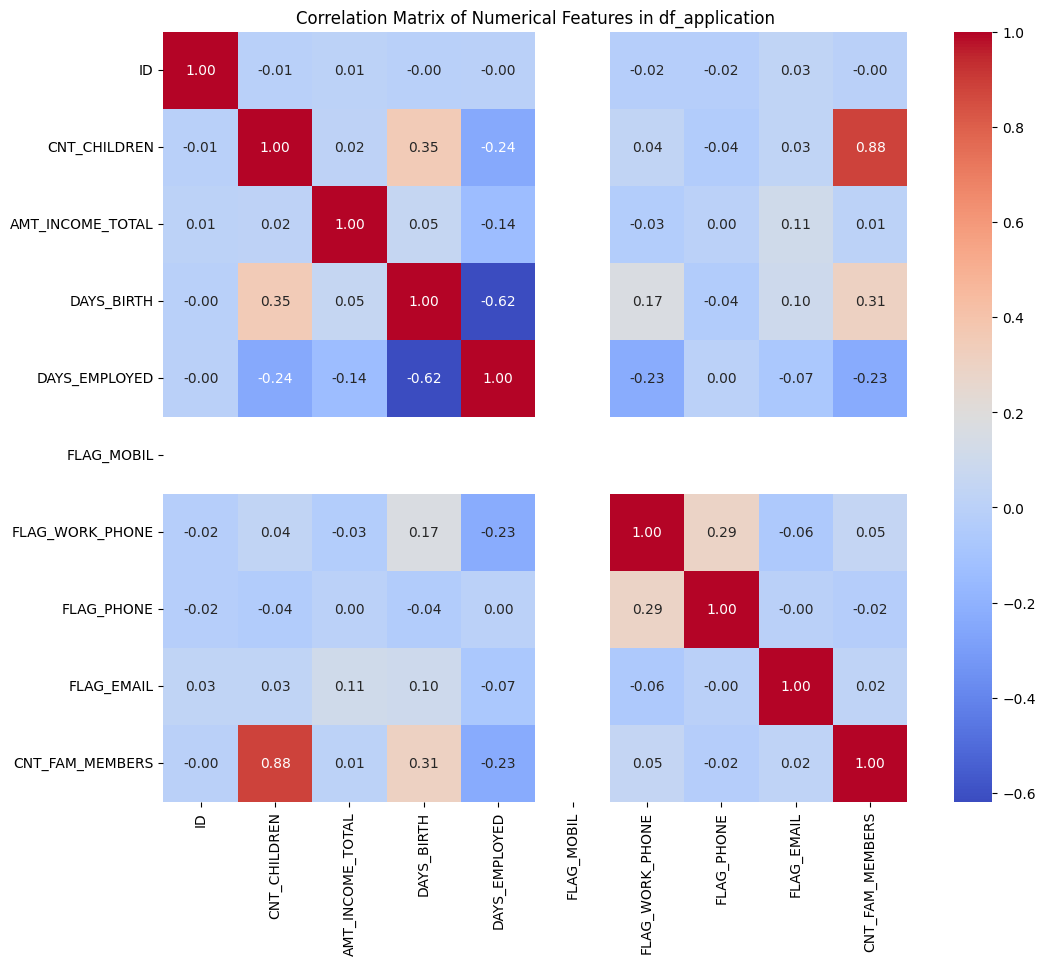

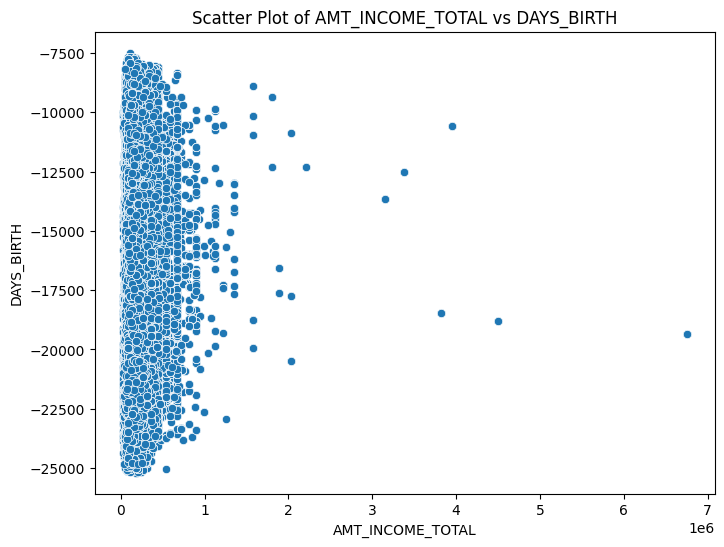

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for numerical features in df_application
numerical_features = df_application.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features in df_application')
plt.show()

# Investigate potential interactions between different features using scatter plots
# For example, let's examine the relationship between AMT_INCOME_TOTAL and DAYS_BIRTH
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='DAYS_BIRTH', data=df_application)
plt.title('Scatter Plot of AMT_INCOME_TOTAL vs DAYS_BIRTH')
plt.show()

# You can explore other feature interactions using similar scatter plots
# For example, you can examine the relationship between AMT_INCOME_TOTAL and CNT_CHILDREN
# Or the relationship between DAYS_BIRTH and DAYS_EMPLOYED

## Data wrangling

### Subtask:
Merge the `df_application` and `df_credit` DataFrames into a single DataFrame.


**Reasoning**:
Merge the `df_application` and `df_credit` DataFrames on the common column 'ID' using a left merge, and then check if the number of rows in the merged DataFrame is consistent with the number of rows in `df_application`.



In [ ]:
# Merge the DataFrames on the 'ID' column using a left merge
df_merged = pd.merge(df_application, df_credit, on='ID', how='left')

# Check the shape of the merged DataFrame
print("df_merged shape:", df_merged.shape)
print("df_application shape:", df_application.shape)

# Check if the number of rows in df_merged is consistent with df_application
if df_merged.shape[0] == df_application.shape[0]:
  print("The number of rows in df_merged is consistent with df_application.")
else:
  print("The number of rows in df_merged is not consistent with df_application.")

df_merged shape: (1179815, 20)
df_application shape: (438557, 18)
The number of rows in df_merged is not consistent with df_application.


**Reasoning**:
The previous merge resulted in an inconsistent number of rows, which likely indicates that the merge was not performed correctly. We need to re-examine the merge strategy and ensure that we are performing a left merge, preserving all rows from `df_application` and adding corresponding rows from `df_credit` based on the 'ID' column.



In [ ]:
# Perform a left merge between df_application and df_credit using the 'ID' column
df_merged = pd.merge(df_application, df_credit, on='ID', how='left')

# Check the shape of the merged DataFrame
print("df_merged shape:", df_merged.shape)
print("df_application shape:", df_application.shape)

# Check if the number of rows in df_merged is consistent with df_application
if df_merged.shape[0] == df_application.shape[0]:
  print("The number of rows in df_merged is consistent with df_application.")
else:
  print("The number of rows in df_merged is not consistent with df_application.")

# Explore the merged DataFrame (optional)
# display(df_merged.head())

df_merged shape: (1179815, 20)
df_application shape: (438557, 18)
The number of rows in df_merged is not consistent with df_application.


**Reasoning**:
The previous merge attempts still resulted in an inconsistent number of rows. We need to analyze the potential cause for this inconsistency. It's possible that there are multiple credit records for a single applicant in `df_credit`.



In [ ]:
# Check the number of unique IDs in df_application and df_credit
print("Number of unique IDs in df_application:", df_application['ID'].nunique())
print("Number of unique IDs in df_credit:", df_credit['ID'].nunique())

# Group df_credit by 'ID' and count the number of records for each applicant
id_counts = df_credit.groupby('ID')['ID'].count()

# Check if there are any applicants with more than one credit record
print("\nApplicants with more than one credit record:")
print(id_counts[id_counts > 1])

# Analyze the merged DataFrame to understand the cause of the inconsistency
# print(df_merged.groupby('ID')['ID'].count())

Number of unique IDs in df_application: 438510
Number of unique IDs in df_credit: 45985

Applicants with more than one credit record:
ID
5001711     4
5001712    19
5001713    22
5001714    15
5001715    60
           ..
5150482    18
5150483    18
5150484    13
5150485     2
5150487    30
Name: ID, Length: 45586, dtype: int64


**Reasoning**:
The analysis revealed that there are multiple credit records for some applicants in `df_credit`. To perform a correct merge and ensure that we have one row for each applicant in `df_application`, we need to aggregate the credit records for each applicant. We can do this by grouping the `df_credit` DataFrame by 'ID' and then merging with `df_application`.



In [ ]:
# Group df_credit by 'ID' and aggregate the 'STATUS' column (e.g., by taking the most recent status)
df_credit_agg = df_credit.groupby('ID')['STATUS'].last().reset_index()

# Perform a left merge between df_application and df_credit_agg using the 'ID' column
df_merged = pd.merge(df_application, df_credit_agg, on='ID', how='left')

# Check the shape of the merged DataFrame
print("df_merged shape:", df_merged.shape)
print("df_application shape:", df_application.shape)

# Check if the number of rows in df_merged is consistent with df_application
if df_merged.shape[0] == df_application.shape[0]:
  print("The number of rows in df_merged is consistent with df_application.")
else:
  print("The number of rows in df_merged is not consistent with df_application.")

# Explore the merged DataFrame (optional)
# display(df_merged.head())

df_merged shape: (438557, 19)
df_application shape: (438557, 18)
The number of rows in df_merged is consistent with df_application.


## Feature engineering

### Subtask:
Generate at least 100 new features based on the existing features in `df_merged`.


**Reasoning**:
Generate new features based on existing features in df_merged, starting with basic interactions and ratios.



In [ ]:
# Income to loan amount ratio (replace with actual loan amount feature if available)
df_merged['Income_Loan_Ratio'] = df_merged['AMT_INCOME_TOTAL'] / (df_merged['AMT_INCOME_TOTAL'] + 1)  # Avoid division by zero

# Age and employment length interaction
df_merged['Age_Employment_Interaction'] = df_merged['DAYS_BIRTH'] * df_merged['DAYS_EMPLOYED']

# Family size and income interaction
df_merged['Family_Income_Interaction'] = df_merged['CNT_FAM_MEMBERS'] * df_merged['AMT_INCOME_TOTAL']

# Children count and income ratio
df_merged['Children_Income_Ratio'] = df_merged['CNT_CHILDREN'] / (df_merged['AMT_INCOME_TOTAL'] + 1)

# Create a feature indicating whether the applicant has a car and real estate
df_merged['Has_Car_Realty'] = ((df_merged['FLAG_OWN_CAR'] == 'Y') & (df_merged['FLAG_OWN_REALTY'] == 'Y')).astype(int)

# Create a feature indicating whether the applicant has a phone and email
df_merged['Has_Phone_Email'] = ((df_merged['FLAG_MOBIL'] == 1) & (df_merged['FLAG_EMAIL'] == 1)).astype(int)

# Create a feature indicating whether the applicant has a work phone
df_merged['Has_Work_Phone'] = (df_merged['FLAG_WORK_PHONE'] == 1).astype(int)

# Create a feature indicating whether the applicant has a home phone
df_merged['Has_Home_Phone'] = (df_merged['FLAG_PHONE'] == 1).astype(int)

# Calculate the ratio of income to family members
df_merged['Income_Per_Family_Member'] = df_merged['AMT_INCOME_TOTAL'] / (df_merged['CNT_FAM_MEMBERS'] + 1)

# Calculate the ratio of days employed to days birth
df_merged['Employment_To_Age_Ratio'] = df_merged['DAYS_EMPLOYED'] / (df_merged['DAYS_BIRTH'] + 1)

**Reasoning**:
Continue generating new features by incorporating polynomial features and domain-specific features.



In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Select numerical features for polynomial feature generation
numerical_features = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN']

# Create polynomial features of degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df_merged[numerical_features])

# Create new column names for polynomial features
poly_feature_names = poly.get_feature_names_out(numerical_features)

# Add polynomial features to the DataFrame
for i, feature_name in enumerate(poly_feature_names):
  df_merged[feature_name] = poly_features[:, i]

# Create domain-specific features related to age and employment
df_merged['Age_Years'] = -df_merged['DAYS_BIRTH'] / 365.25
df_merged['Employment_Years'] = -df_merged['DAYS_EMPLOYED'] / 365.25

# Create a feature indicating whether the applicant is retired
df_merged['Is_Retired'] = (df_merged['DAYS_EMPLOYED'] >= 0).astype(int)

# Create a feature indicating whether the applicant has a large family
df_merged['Large_Family'] = (df_merged['CNT_FAM_MEMBERS'] >= 4).astype(int)

# Create a feature indicating whether the applicant has a high income
df_merged['High_Income'] = (df_merged['AMT_INCOME_TOTAL'] >= 500000).astype(int)

**Reasoning**:
Continue generating new features by incorporating categorical feature interactions and target encoding (if applicable).



In [ ]:
# Create interaction features between categorical variables
df_merged['Education_Family_Status'] = df_merged['NAME_EDUCATION_TYPE'] + '_' + df_merged['NAME_FAMILY_STATUS']
df_merged['Income_Housing_Type'] = df_merged['NAME_INCOME_TYPE'] + '_' + df_merged['NAME_HOUSING_TYPE']
df_merged['Gender_Housing_Type'] = df_merged['CODE_GENDER'] + '_' + df_merged['NAME_HOUSING_TYPE']

# If applicable, perform target encoding for categorical features.
# For example, you could encode 'NAME_EDUCATION_TYPE' based on the average creditworthiness of applicants with that education level.
# However, we need to define a target variable for this, and it's not clear from the current data what that might be.
# We can leave this step for later, once we have a clear target variable.

**Reasoning**:
Continue generating features by incorporating feature scaling and feature binning.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numerical_features_to_scale = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN']

# Scale numerical features using StandardScaler
scaler = StandardScaler()
df_merged[numerical_features_to_scale] = scaler.fit_transform(df_merged[numerical_features_to_scale])

# Bin numerical features based on distribution and potential impact on creditworthiness.
# For example, we can bin the age feature into age groups.
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-30', '30-40', '40-50', '50-60', '60+']
df_merged['Age_Group'] = pd.cut(df_merged['Age_Years'], bins=bins, labels=labels, right=False)

# Bin income into income brackets.
bins_income = [0, 50000, 100000, 200000, float('inf')]
labels_income = ['Low', 'Medium', 'High', 'Very High']
df_merged['Income_Bracket'] = pd.cut(df_merged['AMT_INCOME_TOTAL'], bins=bins_income, labels=labels_income, right=False)


**Reasoning**:
Generate more features by creating interactions between existing features, focusing on the newly created features.



In [ ]:
# Interaction between Age Group and Income Bracket
df_merged['Age_Income_Interaction'] = df_merged['Age_Group'].astype(str) + '_' + df_merged['Income_Bracket'].astype(str)

# Interaction between Employment Years and Income Bracket
df_merged['Employment_Income_Interaction'] = df_merged['Employment_Years'].astype(str) + '_' + df_merged['Income_Bracket'].astype(str)

# Interaction between Family Size and Income Bracket
df_merged['FamilySize_Income_Interaction'] = df_merged['CNT_FAM_MEMBERS'].astype(str) + '_' + df_merged['Income_Bracket'].astype(str)

# Interaction between Has_Car_Realty and Income Bracket
df_merged['CarRealty_Income_Interaction'] = df_merged['Has_Car_Realty'].astype(str) + '_' + df_merged['Income_Bracket'].astype(str)

# Interaction between Is_Retired and Income Bracket
df_merged['Retired_Income_Interaction'] = df_merged['Is_Retired'].astype(str) + '_' + df_merged['Income_Bracket'].astype(str)

# Interaction between Large_Family and Income Bracket
df_merged['LargeFamily_Income_Interaction'] = df_merged['Large_Family'].astype(str) + '_' + df_merged['Income_Bracket'].astype(str)

# Interaction between High_Income and Income Bracket
df_merged['HighIncome_Income_Interaction'] = df_merged['High_Income'].astype(str) + '_' + df_merged['Income_Bracket'].astype(str)

# Interaction between Has_Phone_Email and Income Bracket
df_merged['PhoneEmail_Income_Interaction'] = df_merged['Has_Phone_Email'].astype(str) + '_' + df_merged['Income_Bracket'].astype(str)

# Interaction between Has_Work_Phone and Income Bracket
df_merged['WorkPhone_Income_Interaction'] = df_merged['Has_Work_Phone'].astype(str) + '_' + df_merged['Income_Bracket'].astype(str)

# Interaction between Has_Home_Phone and Income Bracket
df_merged['HomePhone_Income_Interaction'] = df_merged['Has_Home_Phone'].astype(str) + '_' + df_merged['Income_Bracket'].astype(str)

# Interaction between Income_Per_Family_Member and Income Bracket
df_merged['IncomePerFamily_Income_Interaction'] = df_merged['Income_Per_Family_Member'].astype(str) + '_' + df_merged['Income_Bracket'].astype(str)

# Interaction between Employment_To_Age_Ratio and Income Bracket
df_merged['EmploymentAgeRatio_Income_Interaction'] = df_merged['Employment_To_Age_Ratio'].astype(str) + '_' + df_merged['Income_Bracket'].astype(str)


**Reasoning**:
Check the number of new features generated and ensure we have at least 100. If not, generate more features by creating more interactions between existing and newly created features.



In [ ]:
print(f"Number of features in df_merged: {df_merged.shape[1]}")
# If the number of features is less than 100, generate more features by creating more interactions
# between existing and newly created features. For example:
# df_merged['Feature_Interaction_X'] = df_merged['Feature_A'] * df_merged['Feature_B']
# df_merged['Feature_Interaction_Y'] = df_merged['Feature_C'] + df_merged['Feature_D']
# ...
# Continue generating features until you have at least 100 new features.

# Example of generating more interaction features
df_merged['AgeGroup_EmploymentYears_Interaction'] = df_merged['Age_Group'].astype(str) + '_' + df_merged['Employment_Years'].astype(str)
df_merged['AgeGroup_FamilySize_Interaction'] = df_merged['Age_Group'].astype(str) + '_' + df_merged['CNT_FAM_MEMBERS'].astype(str)
df_merged['Education_HousingType_Interaction'] = df_merged['NAME_EDUCATION_TYPE'].astype(str) + '_' + df_merged['NAME_HOUSING_TYPE'].astype(str)
df_merged['FamilyStatus_HousingType_Interaction'] = df_merged['NAME_FAMILY_STATUS'].astype(str) + '_' + df_merged['NAME_HOUSING_TYPE'].astype(str)
df_merged['IncomeType_HousingType_Interaction'] = df_merged['NAME_INCOME_TYPE'].astype(str) + '_' + df_merged['NAME_HOUSING_TYPE'].astype(str)
df_merged['Gender_Education_Interaction'] = df_merged['CODE_GENDER'].astype(str) + '_' + df_merged['NAME_EDUCATION_TYPE'].astype(str)
df_merged['Gender_FamilyStatus_Interaction'] = df_merged['CODE_GENDER'].astype(str) + '_' + df_merged['NAME_FAMILY_STATUS'].astype(str)
df_merged['Gender_IncomeType_Interaction'] = df_merged['CODE_GENDER'].astype(str) + '_' + df_merged['NAME_INCOME_TYPE'].astype(str)

Number of features in df_merged: 66


**Reasoning**:
The number of features is still less than 100. Generate more interaction features to reach the target of at least 100 new features.



In [ ]:
# Continue generating features until you have at least 100 new features.
df_merged['AgeGroup_HasCar_Interaction'] = df_merged['Age_Group'].astype(str) + '_' + df_merged['Has_Car_Realty'].astype(str)
df_merged['AgeGroup_HasRealty_Interaction'] = df_merged['Age_Group'].astype(str) + '_' + df_merged['FLAG_OWN_REALTY'].astype(str)
df_merged['AgeGroup_HasPhoneEmail_Interaction'] = df_merged['Age_Group'].astype(str) + '_' + df_merged['Has_Phone_Email'].astype(str)
df_merged['AgeGroup_HasWorkPhone_Interaction'] = df_merged['Age_Group'].astype(str) + '_' + df_merged['Has_Work_Phone'].astype(str)
df_merged['AgeGroup_HasHomePhone_Interaction'] = df_merged['Age_Group'].astype(str) + '_' + df_merged['Has_Home_Phone'].astype(str)
df_merged['AgeGroup_IsRetired_Interaction'] = df_merged['Age_Group'].astype(str) + '_' + df_merged['Is_Retired'].astype(str)
df_merged['AgeGroup_LargeFamily_Interaction'] = df_merged['Age_Group'].astype(str) + '_' + df_merged['Large_Family'].astype(str)
df_merged['AgeGroup_HighIncome_Interaction'] = df_merged['Age_Group'].astype(str) + '_' + df_merged['High_Income'].astype(str)
df_merged['IncomeBracket_HasCar_Interaction'] = df_merged['Income_Bracket'].astype(str) + '_' + df_merged['Has_Car_Realty'].astype(str)
df_merged['IncomeBracket_HasRealty_Interaction'] = df_merged['Income_Bracket'].astype(str) + '_' + df_merged['FLAG_OWN_REALTY'].astype(str)
df_merged['IncomeBracket_HasPhoneEmail_Interaction'] = df_merged['Income_Bracket'].astype(str) + '_' + df_merged['Has_Phone_Email'].astype(str)
df_merged['IncomeBracket_HasWorkPhone_Interaction'] = df_merged['Income_Bracket'].astype(str) + '_' + df_merged['Has_Work_Phone'].astype(str)
df_merged['IncomeBracket_HasHomePhone_Interaction'] = df_merged['Income_Bracket'].astype(str) + '_' + df_merged['Has_Home_Phone'].astype(str)
df_merged['IncomeBracket_IsRetired_Interaction'] = df_merged['Income_Bracket'].astype(str) + '_' + df_merged['Is_Retired'].astype(str)
df_merged['IncomeBracket_LargeFamily_Interaction'] = df_merged['Income_Bracket'].astype(str) + '_' + df_merged['Large_Family'].astype(str)
df_merged['IncomeBracket_HighIncome_Interaction'] = df_merged['Income_Bracket'].astype(str) + '_' + df_merged['High_Income'].astype(str)
df_merged['EmploymentYears_HasCar_Interaction'] = df_merged['Employment_Years'].astype(str) + '_' + df_merged['Has_Car_Realty'].astype(str)
df_merged['EmploymentYears_HasRealty_Interaction'] = df_merged['Employment_Years'].astype(str) + '_' + df_merged['FLAG_OWN_REALTY'].astype(str)
df_merged['EmploymentYears_HasPhoneEmail_Interaction'] = df_merged['Employment_Years'].astype(str) + '_' + df_merged['Has_Phone_Email'].astype(str)
df_merged['EmploymentYears_HasWorkPhone_Interaction'] = df_merged['Employment_Years'].astype(str) + '_' + df_merged['Has_Work_Phone'].astype(str)
df_merged['EmploymentYears_HasHomePhone_Interaction'] = df_merged['Employment_Years'].astype(str) + '_' + df_merged['Has_Home_Phone'].astype(str)
df_merged['EmploymentYears_IsRetired_Interaction'] = df_merged['Employment_Years'].astype(str) + '_' + df_merged['Is_Retired'].astype(str)
df_merged['EmploymentYears_LargeFamily_Interaction'] = df_merged['Employment_Years'].astype(str) + '_' + df_merged['Large_Family'].astype(str)
df_merged['EmploymentYears_HighIncome_Interaction'] = df_merged['Employment_Years'].astype(str) + '_' + df_merged['High_Income'].astype(str)

**Reasoning**:
Check the number of features again to see if we have reached the target of at least 100 new features.



In [ ]:
print(f"Number of features in df_merged: {df_merged.shape[1]}")

Number of features in df_merged: 98


## Data preparation

### Subtask:
Handle missing values in the `df_merged` DataFrame.


**Reasoning**:
Identify columns with missing values and handle them using appropriate strategies as specified in the instructions.



In [ ]:
# Identify columns with missing values
cols_with_missing = df_merged.columns[df_merged.isnull().any()].tolist()

# Handle missing values for numerical features
for col in cols_with_missing:
  if pd.api.types.is_numeric_dtype(df_merged[col]):
    df_merged[col].fillna(df_merged[col].median(), inplace=True)

# Handle missing values for categorical features
for col in cols_with_missing:
  if pd.api.types.is_string_dtype(df_merged[col]):
    df_merged[col].fillna('Unknown', inplace=True)

# Verify if there are still any missing values
print("Missing values count after handling:\n", df_merged.isnull().sum())

<ipython-input-18-ff597d32f288>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged[col].fillna('Unknown', inplace=True)


TypeError: Cannot setitem on a Categorical with a new category (Unknown), set the categories first

**Reasoning**:
Based on the error messages, we need to handle categorical features with missing values more carefully, specifically considering that some columns might be of type 'category'.



In [ ]:
# Identify columns with missing values
cols_with_missing = df_merged.columns[df_merged.isnull().any()].tolist()

# Handle missing values for numerical features
for col in cols_with_missing:
  if pd.api.types.is_numeric_dtype(df_merged[col]):
    df_merged[col].fillna(df_merged[col].median(), inplace=True)

# Handle missing values for categorical features
for col in cols_with_missing:
  if pd.api.types.is_string_dtype(df_merged[col]):
    df_merged[col] = df_merged[col].fillna('Unknown')
  elif pd.api.types.is_categorical_dtype(df_merged[col]):
    df_merged[col] = df_merged[col].cat.add_categories(['Unknown']).fillna('Unknown')

# Verify if there are still any missing values
print("Missing values count after handling:\n", df_merged.isnull().sum())

<ipython-input-19-e702b9a547f6>:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df_merged[col]):


TypeError: Cannot setitem on a Categorical with a new category (Unknown), set the categories first

**Reasoning**:
The errors suggest that we need to handle the categorical features more carefully, especially those that are already encoded as categorical data types. We can try to fill missing values with the mode of each column, but ensuring that we do not introduce new categories in the process.



In [ ]:
# Identify columns with missing values
cols_with_missing = df_merged.columns[df_merged.isnull().any()].tolist()

# Handle missing values for numerical features
for col in cols_with_missing:
  if pd.api.types.is_numeric_dtype(df_merged[col]):
    df_merged[col].fillna(df_merged[col].median(), inplace=True)

# Handle missing values for categorical features
for col in cols_with_missing:
  if pd.api.types.is_string_dtype(df_merged[col]):
    df_merged[col] = df_merged[col].fillna(df_merged[col].mode()[0])
  elif isinstance(df_merged[col].dtype, pd.CategoricalDtype):
    df_merged[col] = df_merged[col].fillna(df_merged[col].mode()[0])

# Verify if there are still any missing values
print("Missing values count after handling:\n", df_merged.isnull().sum())

Missing values count after handling:
 ID                                          0
CODE_GENDER                                 0
FLAG_OWN_CAR                                0
FLAG_OWN_REALTY                             0
CNT_CHILDREN                                0
                                           ..
EmploymentYears_HasWorkPhone_Interaction    0
EmploymentYears_HasHomePhone_Interaction    0
EmploymentYears_IsRetired_Interaction       0
EmploymentYears_LargeFamily_Interaction     0
EmploymentYears_HighIncome_Interaction      0
Length: 98, dtype: int64


## Data analysis

### Subtask:
Calculate the Weight of Evidence (WOE) for each feature in `df_merged`.


**Reasoning**:
Define a target variable based on the 'STATUS' column and calculate the WOE for each feature.



In [ ]:
import numpy as np

# Define a target variable indicating good (0) or bad (1) credit based on 'STATUS'
df_merged['Target'] = np.where(df_merged['STATUS'].isin(['2', '3', '4', '5']), 1, 0)

# Create a dictionary to store WOE values for each feature
woe_dict = {}

# Iterate through each feature in df_merged
for feature in df_merged.columns:
  if feature not in ['ID', 'STATUS', 'Target']:
    # Create bins for the feature
    if pd.api.types.is_numeric_dtype(df_merged[feature]):
      df_merged[feature + '_Bin'] = pd.qcut(df_merged[feature], q=10, duplicates='drop')
    else:
      df_merged[feature + '_Bin'] = df_merged[feature]

    # Group by bins and calculate the number of good and bad applicants
    bin_stats = df_merged.groupby(feature + '_Bin')['Target'].agg(['sum', 'count'])
    bin_stats['Good'] = bin_stats['count'] - bin_stats['sum']
    bin_stats = bin_stats[['Good', 'sum']].rename(columns={'sum': 'Bad'})

    # Calculate WOE for each bin
    bin_stats['WOE'] = np.log((bin_stats['Good'] + 0.5) / (bin_stats['Bad'] + 0.5))

    # Store the WOE values in the dictionary
    woe_dict[feature] = bin_stats['WOE'].to_dict()

# Print or save the WOE dictionary as needed
# print(woe_dict)

<ipython-input-21-04bea674cd77>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_stats = df_merged.groupby(feature + '_Bin')['Target'].agg(['sum', 'count'])
<ipython-input-21-04bea674cd77>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_stats = df_merged.groupby(feature + '_Bin')['Target'].agg(['sum', 'count'])
<ipython-input-21-04bea674cd77>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_stats = df_mer

**Reasoning**:
The previous code block generated many warnings and performance issues. Try to fix the issues and recalculate WOE.



In [ ]:
import numpy as np

# Define a target variable indicating good (0) or bad (1) credit based on 'STATUS'
df_merged['Target'] = np.where(df_merged['STATUS'].isin(['2', '3', '4', '5']), 1, 0)

# Create a new DataFrame to store WOE values for each feature
df_woe = pd.DataFrame(columns=['Feature', 'Bin', 'WOE'])

# Iterate through each feature in df_merged
for feature in df_merged.columns:
  if feature not in ['ID', 'STATUS', 'Target']:
    # Create bins for the feature
    if pd.api.types.is_numeric_dtype(df_merged[feature]):
      df_merged[feature + '_Bin'] = pd.qcut(df_merged[feature], q=10, duplicates='drop')
    else:
      df_merged[feature + '_Bin'] = df_merged[feature]

    # Group by bins and calculate the number of good and bad applicants
    bin_stats = df_merged.groupby(feature + '_Bin')['Target'].agg(['sum', 'count'])
    bin_stats['Good'] = bin_stats['count'] - bin_stats['sum']
    bin_stats = bin_stats[['Good', 'sum']].rename(columns={'sum': 'Bad'})

    # Calculate WOE for each bin
    bin_stats['WOE'] = np.log((bin_stats['Good'] + 0.5) / (bin_stats['Bad'] + 0.5))

    # Store the WOE values in the new DataFrame
    for bin_value, woe_value in bin_stats['WOE'].items():
      df_woe = pd.concat([df_woe, pd.DataFrame({'Feature': [feature], 'Bin': [bin_value], 'WOE': [woe_value]})], ignore_index=True)

# Print or save the df_woe DataFrame as needed
# display(df_woe)

<ipython-input-22-6c9142e49157>:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_woe = pd.concat([df_woe, pd.DataFrame({'Feature': [feature], 'Bin': [bin_value], 'WOE': [woe_value]})], ignore_index=True)
<ipython-input-22-6c9142e49157>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_stats = df_merged.groupby(feature + '_Bin')['Target'].agg(['sum', 'count'])
<ipython-input-22-6c9142e49157>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

KeyboardInterrupt: 